In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/hdroadimg.jpg
/kaggle/input/roadimg/road.png
/kaggle/input/image11/pic_assign1.jpg


# **Part 1**

# Image Loading and Preprocessing

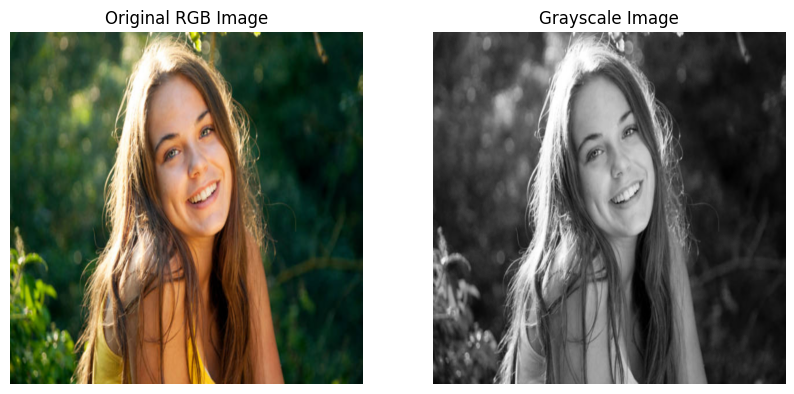

In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread("/kaggle/input/image11/pic_assign1.jpg")
if img is None:
    raise ValueError("Image not found. Check your path!")

img = cv2.resize(img, (800, 800))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.show()


#  Noise Reduction with Median Filter

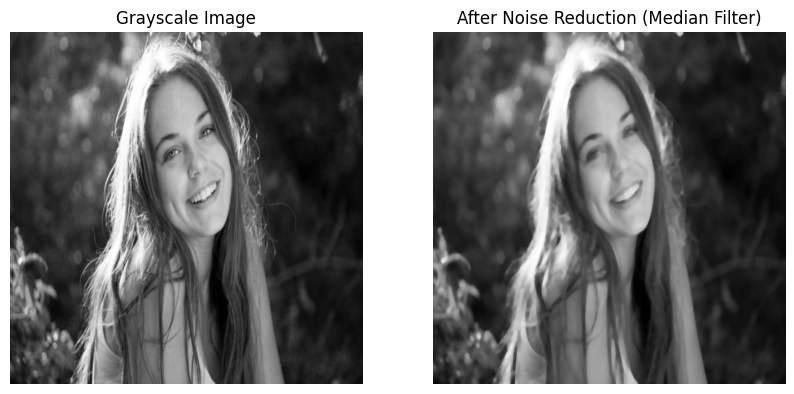

In [6]:
gray_blur = cv2.medianBlur(gray, 9)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray_blur, cmap='gray')
plt.title("After Noise Reduction (Median Filter)")
plt.axis("off")

plt.show()


# Edge Detection with Laplacian Filter

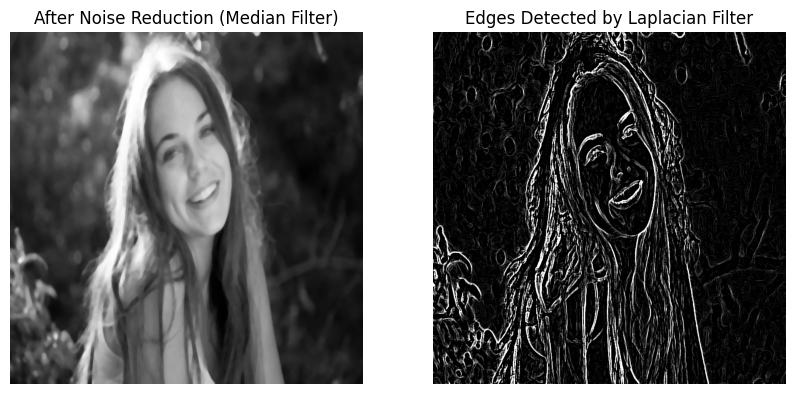

In [7]:
edges = cv2.Laplacian(gray_blur, cv2.CV_8U, ksize=5)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_blur, cmap='gray')
plt.title("After Noise Reduction (Median Filter)")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected by Laplacian Filter")
plt.axis("off")
plt.show()


# Creating Clean Black-and-White Sketch

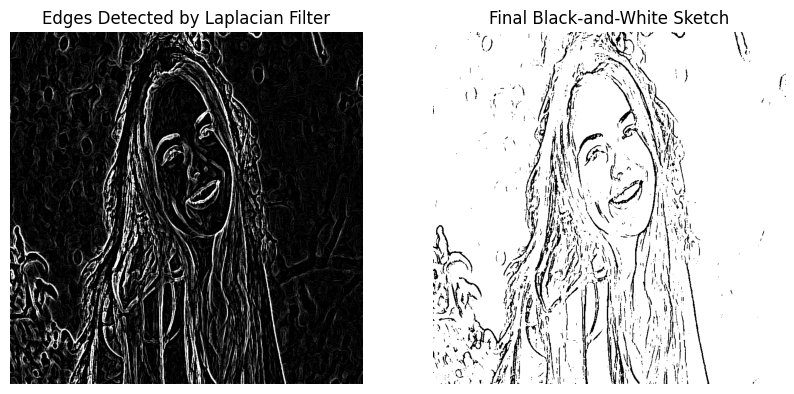

In [8]:
# Convert edges to clean black-and-white (sketch look)
_, sketch = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected by Laplacian Filter")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(sketch, cmap='gray')
plt.title("Final Black-and-White Sketch")
plt.axis("off")
plt.show()


# Creating Color Painting Effect with Bilateral Filter

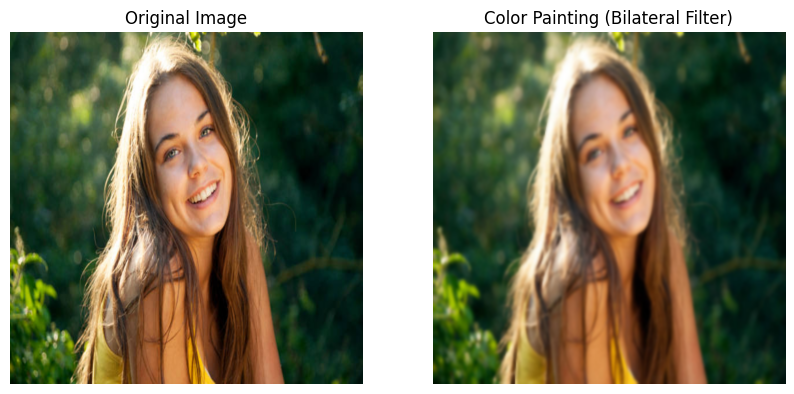

In [9]:

h, w = img.shape[:2]
small = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LINEAR)

for i in range(5):
    small = cv2.bilateralFilter(small, d=3, sigmaColor=200, sigmaSpace=200)

painting = cv2.resize(small, (w, h), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(painting, cv2.COLOR_BGR2RGB))
plt.title("Color Painting (Bilateral Filter)")
plt.axis("off")

plt.show()


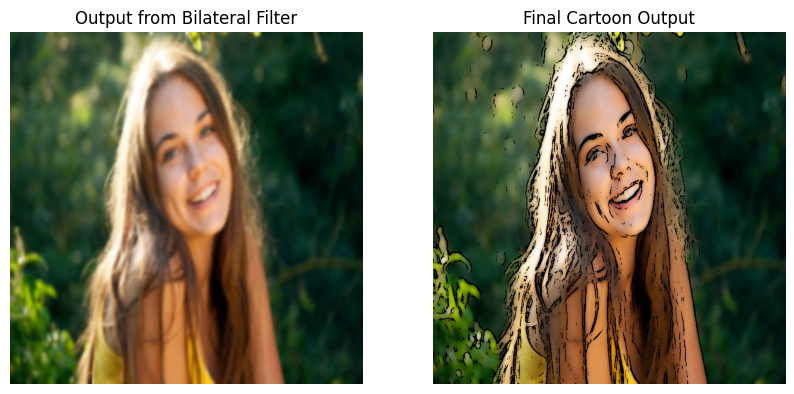

In [10]:
mask = sketch
cartoon = np.zeros_like(painting)
cartoon[mask == 255] = painting[mask == 255]
cartoon[mask == 0] = (0, 0, 0)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(painting, cv2.COLOR_BGR2RGB))
plt.title("Output from Bilateral Filter")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
plt.title("Final Cartoon Output")
plt.axis("off")

plt.show()


# **Part 2**

# Loading image and converting it to Grayscale

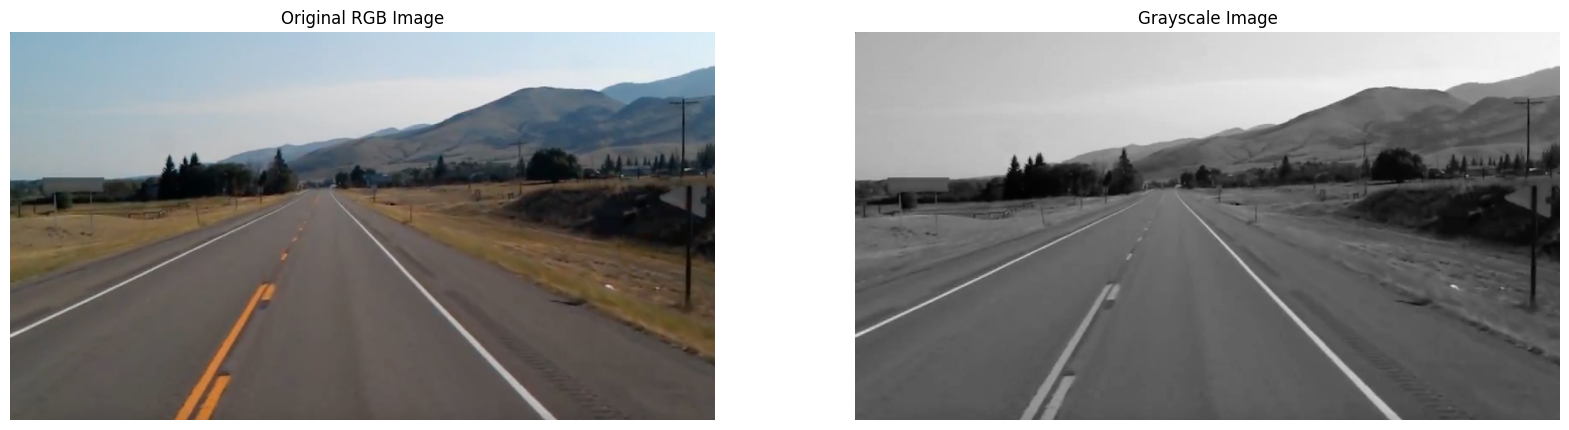

In [11]:
import cv2
import matplotlib.pyplot as plt

# img = cv2.imread("/kaggle/input/images/hdroadimg.jpg")
img = cv2.imread("/kaggle/input/roadimg/road.png")
if img is None:
    raise ValueError("Image not found. Check your path!")

# grayscale image is better for edge detection with canny and to reduce complexity
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.show()


 # **Smoothing using median Filter**

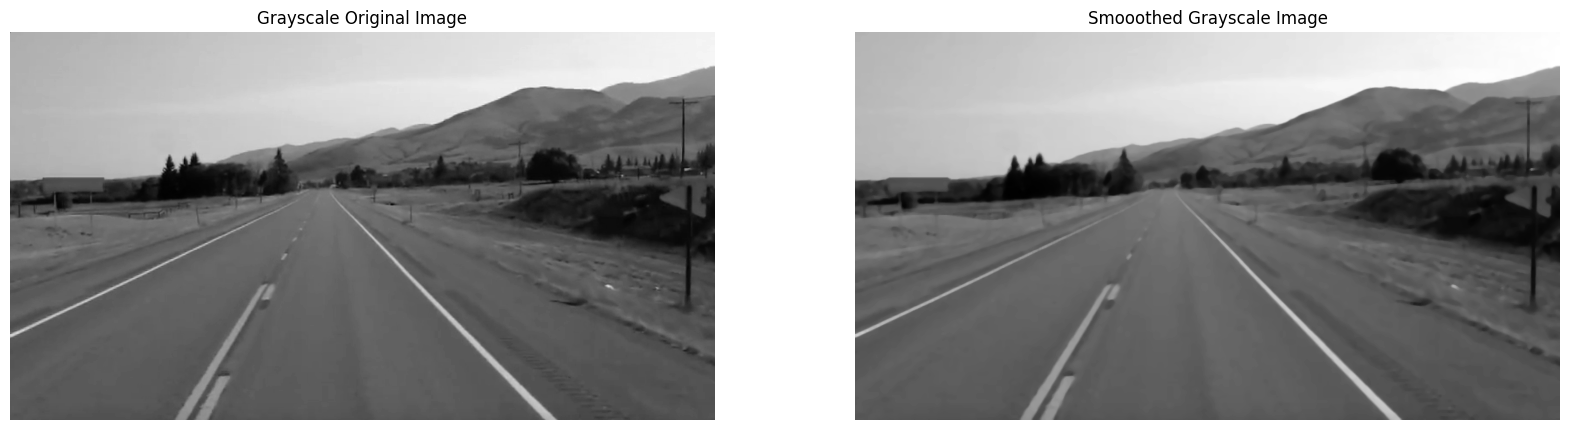

In [12]:
gray_smoothed = cv2.medianBlur(gray, 7)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_smoothed, cmap='gray')
plt.title("Smooothed Grayscale Image")
plt.axis("off")

plt.show()

# Applying edge detection

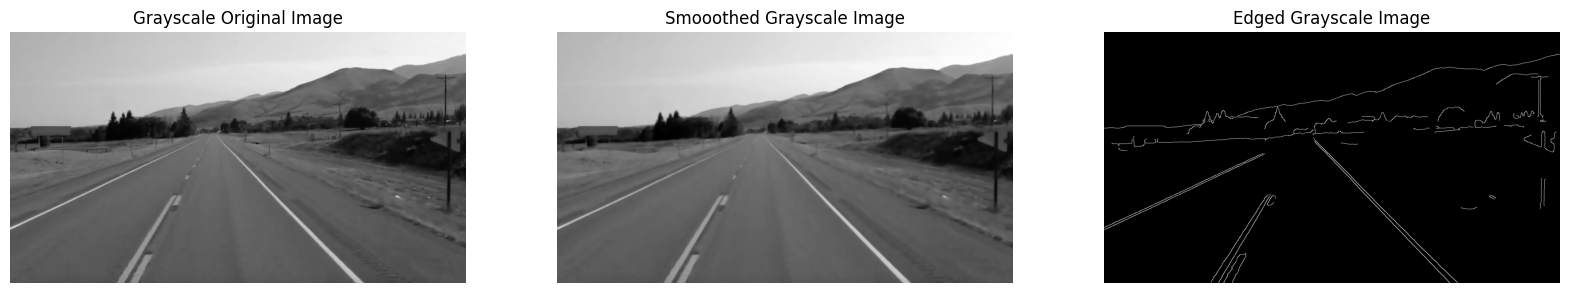

In [13]:
low_threshold = 50
high_threshold = 150
edged_image = cv2.Canny(gray_smoothed, low_threshold, high_threshold)

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray_smoothed, cmap='gray')
plt.title("Smooothed Grayscale Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(edged_image, cmap='gray', vmin=0, vmax=255)
plt.title("Edged Grayscale Image")
plt.axis("off")


plt.show()

# Region of Interest 

In [14]:
def region_selection(image):
    # create an array of the same size as of the input image 
    mask = np.zeros_like(image) 
    
    # color of the mask polygon (white)
    mask_color = 255
    
    # creating a polygon to focus only on the road in the picture
    rows, cols = image.shape[:2]

    #top left corner of the image is 0,0 rows are height and top is 0. columns are width and left is 0 
    bottom_left  = [cols * 0.00001, rows * 0.99]
    top_left     = [cols * 0.08, rows * 0.45]
    bottom_right = [cols * 0.9, rows * 0.99]
    top_right    = [cols * 0.6, rows * 0.45]
    # bottom_left  = [cols * 0.0001, rows * 0.99]
    # top_left     = [cols * 0.15, rows * 0.6]
    # bottom_right = [cols * 0.99, rows * 0.99]
    # top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    # filling the polygon with white color and generating the final mask
    cv2.fillPoly(mask, vertices, mask_color)
    # performing Bitwise AND on the input image and mask to get only the edges on the road
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image, mask


# Testing region of interest 

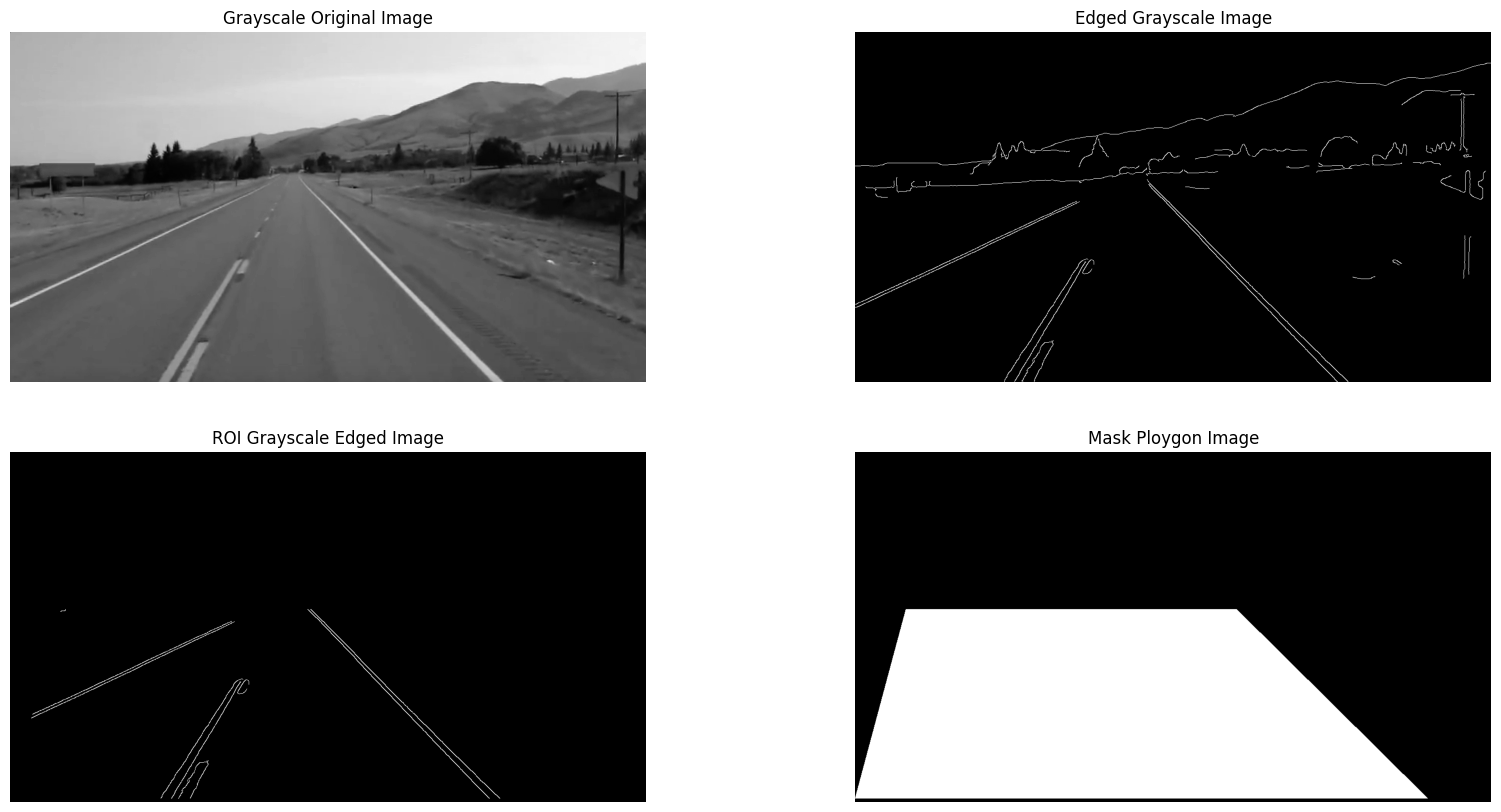

In [15]:

region, mask = region_selection(edged_image)
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Original Image")
plt.axis("off")


plt.subplot(2,2,2)
plt.imshow(edged_image, cmap='gray')
plt.title("Edged Grayscale Image")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(mask, cmap='gray')
plt.title("Mask Ploygon Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(region, cmap='gray', vmin=0, vmax=255)
plt.title("ROI Grayscale Edged Image")
plt.axis("off")

plt.show()

# Creating the Hough Accumulator

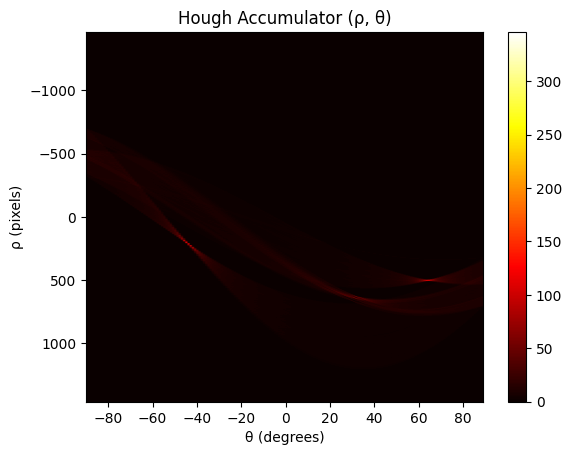

In [16]:

rows, cols = region.shape

# Define rho and theta ranges
thetas = np.deg2rad(np.arange(-90, 90))   # -90° to 90°
diag_len = int(np.ceil(np.sqrt(rows**2 + cols**2)))  # max possible rho
rhos = np.linspace(-diag_len, diag_len, 2*diag_len)

# Create accumulator and initialize the votes to zero
accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)

# Voting
y_idxs, x_idxs = np.nonzero(region)  # edge pixel indices
for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]
    for t_idx in range(len(thetas)):
        theta = thetas[t_idx]
        # add diag_len at the end to ennsure rho is always positive to serve as indices in accumulator
        rho = int(round(x * np.cos(theta) + y * np.sin(theta))) + diag_len
        accumulator[rho, t_idx] += 1

# Display accumulator
# the brighter the color the higher the number of votes 
plt.imshow(accumulator, cmap='hot', aspect='auto',
           extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
plt.title("Hough Accumulator (ρ, θ)")
plt.xlabel("θ (degrees)")
plt.ylabel("ρ (pixels)")
plt.colorbar()
plt.show()

In [17]:
def find_peaks(accumulator, threshold_ratio=0.5, num_peaks=10):
    
    
    # num_peaks : Maximum number of peaks to return
    
    #  Find the maximum number of votes in the accumulator
    max_votes = np.max(accumulator)
    
    #  Peaks must be at least (threshold_ratio * max_votes) to be considered
    #  Example: 0.5 means peaks must have at least 50% of the maximum votes
    threshold = threshold_ratio * max_votes
    
    print(f"Max votes in accumulator: {max_votes}")
    print(f"Threshold for peak detection: {threshold}")
    
    # Find all positions where votes exceed the threshold
    # np.where returns a tuple of arrays (row_indices, col_indices)
    # peak_positions = (
#     array([1, 2, 3]),  # row indices (peak_positions[0])
#     array([1, 2, 1])   # column indices (peak_positions[1])
# ) this means peak positions are (1, 1) 
# Peak at position (2, 2) 
# Peak at position (3, 1) 
    peak_positions = np.where(accumulator >= threshold)
    
     # peaks : list of tuples (rho_idx, theta_idx, vote_count)
     # Indices and vote counts of detected peaks
    peaks = []
    row_indices = peak_positions[0]
    col_indices = peak_positions[1]

    for i in range(len(row_indices)):
        rho_idx = row_indices[i]
        theta_idx = col_indices[i]
        vote_count = accumulator[rho_idx, theta_idx]
        peaks.append((rho_idx, theta_idx, vote_count))
    
    # Sort peaks by vote count (descending order - highest votes first)
    peaks.sort(key=lambda x: x[2], reverse=True)
    
    # Return only the top num_peaks
    peaks = peaks[:num_peaks]
    
    print(f"Found {len(peaks)} peaks above threshold")
    
    return peaks

# NON-MAXIMUM SUPPRESSION

In [18]:
# Remove duplicate detections of the same line
# Lines very close in (ρ, θ) space are likely the same physical line

def non_maximum_suppression(peaks, rho_threshold=50, theta_threshold=10):
    """
    How it works:
    -------------
    - Start with the strongest peak (highest votes)
    - Keep it in the results
    - Remove all weaker peaks that are "too close" to it
    - Move to the next strongest remaining peak
    - Repeat until all peaks are processed
    """
  # rho_threshold : Minimum distance in rho index to consider peaks as separate lines
  # theta_threshold : Minimum distance in theta index to consider peaks as separate lines
    
    if not peaks:
        return []
    
    # Start with an empty list of final peaks
    suppressed_peaks = []
    
    # Create a copy so we can modify it
    remaining_peaks = peaks.copy()
    
    while remaining_peaks:
        # Take the strongest remaining peak which is the first one since it is sorted in decending order
        current_peak = remaining_peaks[0]
        suppressed_peaks.append(current_peak)
        
        # Remove this peak from consideration
        remaining_peaks.pop(0)
        
        # Filter out peaks that are too close to the current peak
        filtered_peaks = []
        for peak in remaining_peaks:
            # Calculate distance in parameter space
            rho_dist = abs(peak[0] - current_peak[0])
            theta_dist = abs(peak[1] - current_peak[1])
            
            # Keep the peak only if it's far enough from current peak
            if rho_dist > rho_threshold or theta_dist > theta_threshold:
                filtered_peaks.append(peak)
        
        remaining_peaks = filtered_peaks
    
    print(f"After NMS: {len(suppressed_peaks)} peaks remain")
    
    return suppressed_peaks


# CONVERT PEAKS TO LINE PARAMETERS

In [19]:
def peaks_to_lines(peaks, thetas, diag_len):
    """
    Convert peak indices to actual line parameters.
    """
    
    lines = []
    for rho_idx, theta_idx, votes in peaks:
        # Subtract diag_len to get back the real rho value
        rho = rho_idx - diag_len
        
        # Look up the actual theta value
        theta = thetas[theta_idx]
        
        lines.append((rho, theta, votes))
    
    return lines

# DRAW LINES ON IMAGE

In [20]:

def draw_lines(image, lines, color=(0, 255, 0), thickness=3):
    """
    Draw detected lines on the image.
    
    Parameters:
    -----------
    image : numpy array
        The image to draw lines on (will be copied, not modified)
    lines : list of tuples (rho, theta, vote_count)
        Line parameters to draw
    color : tuple (B, G, R)
        Color of the lines in BGR format to match cv.line
    thickness : int
        Thickness of the lines in pixels
    
    Returns:
    --------
    output : numpy array
        Image with lines drawn on it
    
    How it works:
    -------------
    For each line defined by (ρ, θ):
    - Calculate two points on the line
    - Extend the line across the entire image
    - Draw the line using cv2.line()
    """
    
    # Make a copy so we don't modify the original
    output = image.copy()
    
    for rho, theta, votes in lines:
        # Convert polar coordinates (ρ, θ) to Cartesian line endpoints
        
        # Calculate cos and sin once
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        
        # Find a point on the line
        # From: x*cos(θ) + y*sin(θ) = ρ
        x0 = cos_theta * rho
        y0 = sin_theta * rho
        
        # Calculate direction perpendicular to the normal
        # This is the direction along the line
        # If normal is (cos θ, sin θ), perpendicular is (-sin θ, cos θ)
        
        # Extend the line far in both directions
        # 2000 is arbitrary - just needs to be larger than image dimensions
        x1 = int(x0 + 2000 * (-sin_theta))
        y1 = int(y0 + 2000 * (cos_theta))
        x2 = int(x0 - 2000 * (-sin_theta))
        y2 = int(y0 - 2000 * (cos_theta))
        
        # Draw the line
        cv2.line(output, (x1, y1), (x2, y2), color, thickness)
    
    return output

In [21]:
def visualize_peaks_on_accumulator(accumulator, peaks, thetas, rhos):
    """
    Visualize the accumulator with detected peaks marked.
    
    Parameters:
    -----------
    accumulator : 2D numpy array
        The Hough accumulator
    peaks : list of tuples (rho_idx, theta_idx, vote_count)
        Detected peaks
    thetas : numpy array
        Theta values for x-axis
    rhos : numpy array
        Rho values for y-axis
    """
    
    plt.figure(figsize=(12, 8))
    
    # Display the accumulator as a heatmap
    plt.imshow(accumulator, cmap='hot', aspect='auto',
               extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), 
                      rhos[-1], rhos[0]])
    
    # Mark the detected peaks with blue circles
    for rho_idx, theta_idx, votes in peaks:
        theta_deg = np.rad2deg(thetas[theta_idx])
        rho_val = rhos[rho_idx]
        plt.plot(theta_deg, rho_val, 'bo', markersize=10, 
                markerfacecolor='cyan', markeredgecolor='blue', 
                markeredgewidth=2)
    
    plt.title("Hough Accumulator with Detected Peaks (marked in cyan)")
    plt.xlabel("θ (degrees)")
    plt.ylabel("ρ (pixels)")
    plt.colorbar(label='Vote Count')
    plt.show()


# MAIN EXECUTION 

Max votes in accumulator: 346
Threshold for peak detection: 138.4
Found 16 peaks above threshold
After NMS: 3 peaks remain

Detected Lines:
Line 1: ρ=202.0 pixels, θ=-45.0°, votes=346
Line 2: ρ=497.0 pixels, θ=65.0°, votes=243
Line 3: ρ=636.0 pixels, θ=31.0°, votes=217


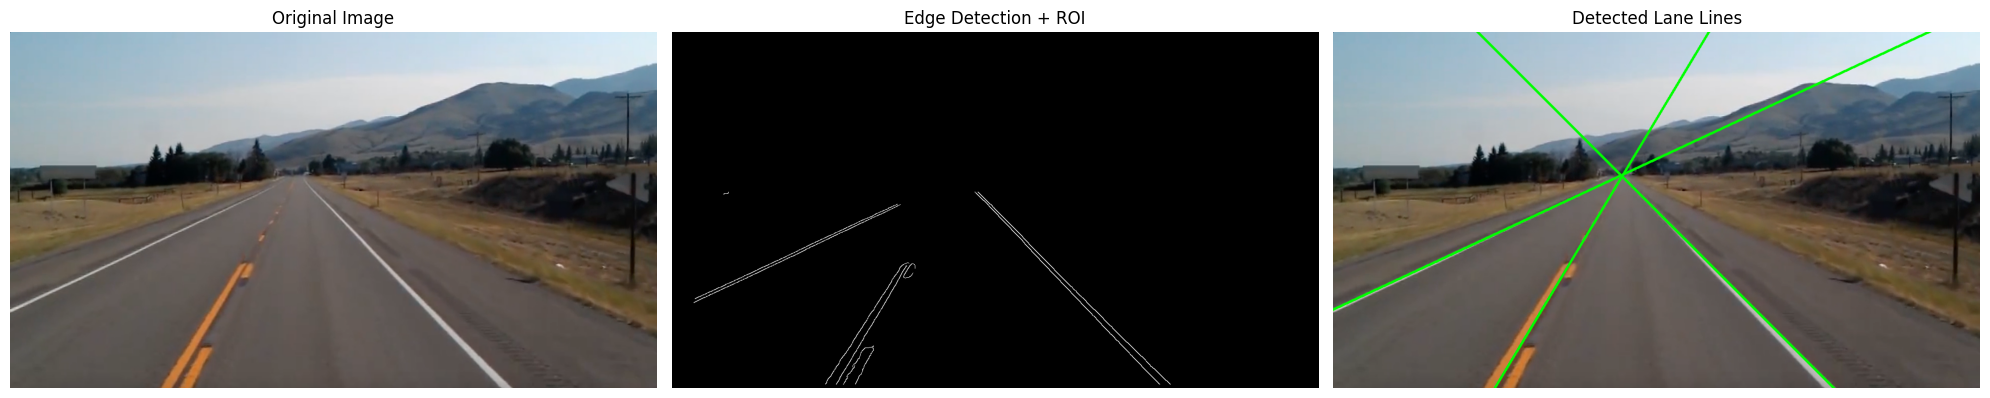

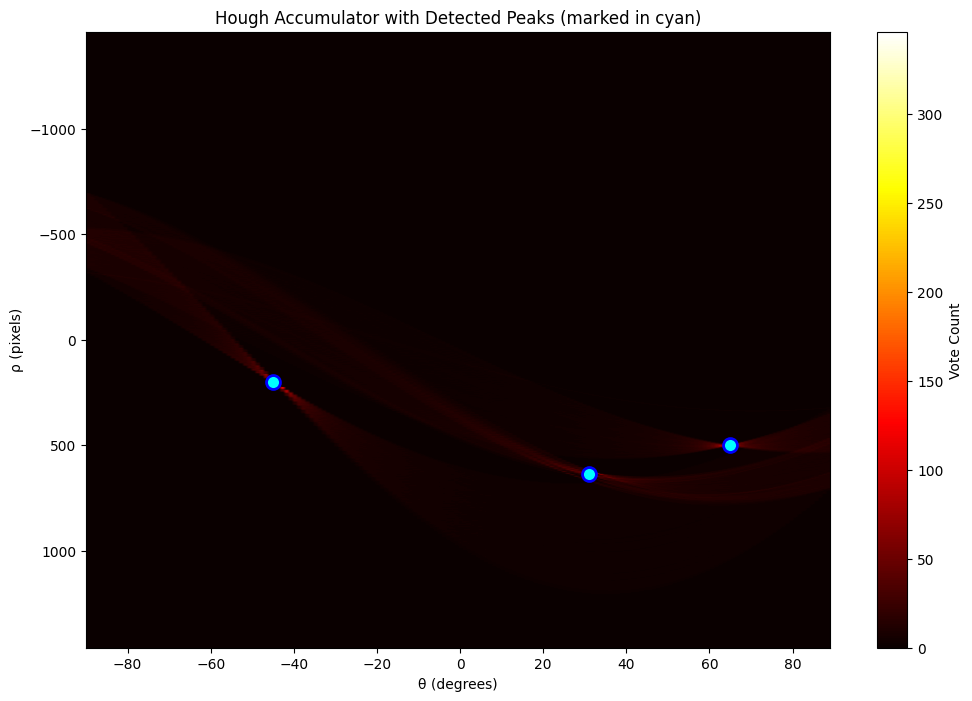

In [22]:

# Find peaks in the accumulator
#  threshold_ratio: higher = fewer but stronger lines
#  num_peaks: maximum number of lines to detect
peaks = find_peaks(accumulator, threshold_ratio=0.4, num_peaks=20)

# Apply non-maximum suppression
# Adjust rho_threshold and theta_threshold to control how close peaks can be
suppressed_peaks = non_maximum_suppression(peaks, rho_threshold=30, theta_threshold=5)

# Convert to actual line parameters
detected_lines = peaks_to_lines(suppressed_peaks, thetas, diag_len)


# Print detected lines
print("\nDetected Lines:")
print("=" * 60)
for i, (rho, theta, votes) in enumerate(detected_lines):
    theta_deg = np.rad2deg(theta)
    print(f"Line {i+1}: ρ={rho:.1f} pixels, θ={theta_deg:.1f}°, votes={votes}")

#  Draw lines on the original image
result_image = draw_lines(img, detected_lines, color=(0, 255, 0), thickness=3)

# Visualize results
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(region, cmap='gray')
plt.title("Edge Detection + ROI")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Lane Lines")
plt.axis("off")

plt.tight_layout()
plt.show()

# Visualize peaks on accumulator
visualize_peaks_on_accumulator(accumulator, suppressed_peaks, thetas, rhos)